<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" title="Python Logo"/> 
<h1> <strong> <em> Alan Bilsky - Data Analyst - Technical Assessment 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import sqlite3

#Connection to sqlite3
conn = sqlite3.connect("mock_db_v2.db")

#Read files
df_asset = pd.read_sql_query("SELECT * FROM asset", conn)
df_asset_asset = pd.read_sql_query("SELECT * FROM asset_asset_types", conn)
df_color = pd.read_sql_query("SELECT * FROM asset_color", conn)
df_type = pd.read_sql_query("SELECT * FROM asset_type", conn)
df_color

#Format date
df_asset['publishedAt']=pd.to_datetime(df_asset['publishedAt'])
df_asset["Year"] = df_asset["publishedAt"].dt.year

#Merging dfs
df_merge_asset = pd.merge(df_asset, df_color, how = 'inner', left_on='id', right_on='assetId')
df_merge_asset_asset = pd.merge(df_asset, df_asset_asset, how = 'inner', left_on='id', right_on='assetId')
df_merge_asset_types = pd.merge(df_asset, df_type, how = 'left', left_on='id', right_on='parentId')
df_merge_type = pd.merge(df_type, df_asset_asset, how = 'inner', left_on='id', right_on='assetTypeId')
df_merge_color = pd.merge(df_merge_type, df_color, how = 'inner', left_on='assetId', right_on='assetId')

#Format year groups
Year_group = df_merge_asset.groupby(['Year'])
yg = Year_group['color'].value_counts().sort_values(ascending=True)

<h3> 1. Average Social Media score (smScore) by the publishing year?

Text(0, 0.5, 'Average Score')

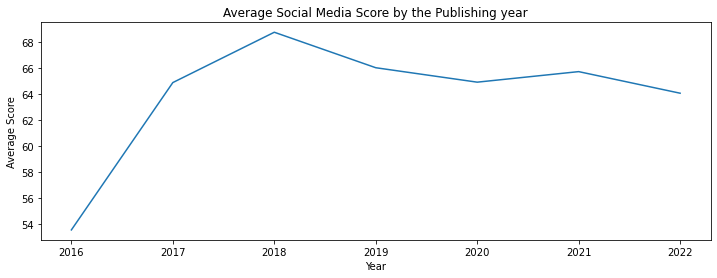

In [2]:
#Social media score average has been dropping since 2018. 
fig, axs = plt.subplots(figsize = (12,4))

df_asset.groupby([df_asset['publishedAt'].dt.year])['smScore'].mean().plot(
    kind = 'line', rot = 0, ax = axs)

plt.title('Average Social Media Score by the Publishing year')
plt.xlabel('Year')
plt.ylabel('Average Score')

In [3]:
df_by_year = df_merge_asset[['Year', 'smScore']]
df_by_year.groupby('Year').mean()

,smScore
Year,
2016,53.550000
2019,61.169127
2020,55.984643
2021,64.487956
2022,66.300630


<h3> 2. What are the most present colors in assets by publishing year?

In [4]:
df_by_year = df_merge_asset[['Year', 'color']]

years_list = (set([x[0][0] for x in yg.items()]))
years_and_colors = []

for year in years_list:
    year_colors = df_by_year[df_by_year["Year"] == year]
    color_count = year_colors['color'].value_counts().sort_values(ascending=True)
    most_common_color_this_year = color_count.tail(1)
    years_and_colors.append((year, most_common_color_this_year.index.tolist()[0],most_common_color_this_year.tolist()[0]))

df_freq = pd.DataFrame(years_and_colors, columns =['Year', 'Color', 'Frequency'])
df_freq

,Year,Color,Frequency
0,2016,Gray,1
1,2019,Green,18
2,2020,Light Gray,14
3,2021,Green,69
4,2022,Light Gray,41


<h3> 3. What are the most present colors in assets by asset type? 

In [5]:
df_names = df_merge_color[['name', 'color']]

name_group = df_merge_color.groupby(['name'])
ng = name_group['color'].value_counts().sort_values(ascending=True)


name_list = (set([x[0][0] for x in ng.items()]))
name_and_colors = []

for name in name_list:
    name_color = df_names[df_names["name"] == name]
    color_count = name_color['color'].value_counts().sort_values(ascending=True)
    most_common_color_per_name = color_count.tail(1)
    name_and_colors.append((name, most_common_color_per_name.index.tolist()[0],most_common_color_per_name.tolist()[0]))

df_freq = pd.DataFrame(name_and_colors, columns =['name', 'Color', 'Frequency'])
df_freq.head()


,name,Color,Frequency
0,Facebook,Green,6
1,Instagram,Green,136


In [6]:
df_names.groupby('name').value_counts()

name       color               
Facebook   Light Gray                6
           Green                     6
           Black                     5
           White                     5
           Sienna                    5
           Tan                       4
           Gray                      4
           Beige                     3
           Golden Rod                3
           Navy                      2
           Khaki                     1
           Rosy Brown                1
           Orange                    1
Instagram  Green                   136
           Light Gray              116
           Gray                    100
           Sienna                   91
           Golden Rod               72
           Black                    70
           Rosy Brown               39
           Bordeaux/ Fire Brick     36
           Tan                      29
           White                    28
           Khaki                    21
           Light Blue           

<h3> Additional insights

In [7]:
#Last two years have been stronger than the rest.

df_by_year = df_merge_asset[['Year', 'smScore']]

years_list = (set([x[0][0] for x in yg.items()]))
years_and_score = []

for year in years_list:
    year_score = df_by_year[df_by_year["Year"] == year]
    score_count = year_score['smScore'].value_counts().sort_values(ascending=True)
    most_common_score_this_year = score_count.tail(1)
    years_and_score.append((year, most_common_score_this_year.index.tolist()[0],most_common_score_this_year.tolist()[0]))

df_freq = pd.DataFrame(years_and_score, columns =['Year', 'smScore', 'Frequency'])
df_freq

,Year,smScore,Frequency
0,2016,53.5500,2
1,2019,54.1500,8
2,2020,69.4500,9
3,2021,77.0625,19
4,2022,71.9500,19


In [8]:
#There's not too many userIds, 01FXJ8HWVQ87T8WJXS4RZXF4DN takes the lead overall.

userscore = df_asset[['userId', 'smScore']]

userwithbestscore = userscore.groupby(by=["userId"], dropna=False).mean()

userwithbestscore.sort_values(by='smScore', ascending=False)

,smScore
userId,
01FXJ8HWVQ87T8WJXS4RZXF4DN,70.331250
01G0YNEGJKY921Z0T60VDXHNKE,69.111112
01FYEMPG5PQXT3FFTZAK0G9WHG,64.947014
01FX343ZMKRE343QJJY7ETBEJ5,64.287629
01FXJD3C66Z3KV2XM9KZFNG73K,62.295486
01FXJD3C6678VN2NJZ6BCWGSQM,46.081189
